In [1]:
# Keras Neural Network를 이용한 OR 연산 분류
# 003-01.ipynb의 수동 구현 Logistic Regression을 Keras로 구현

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 맥북 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print("Keras Neural Network를 이용한 OR 연산 분류")
print("="*50)


Keras Neural Network를 이용한 OR 연산 분류


In [ ]:
# 1. OR 연산 데이터셋 생성 (003-01.ipynb와 동일)
print("1. OR 연산 데이터셋 생성")
print("-" * 30)

# OR 연산 진리표
# 입력1, 입력2 -> 출력
# 0, 0 -> 0
# 0, 1 -> 1  
# 1, 0 -> 1
# 1, 1 -> 1

# 입력 데이터 (X)
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]], dtype=np.float32)

# 출력 데이터 (y) - OR 연산 결과
y = np.array([0, 1, 1, 1], dtype=np.float32)

print("입력 데이터 (X):")
print(X)
print("\n출력 데이터 (y) - OR 연산 결과:")
print(y)

print(f"\n데이터 형태:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# OR 연산 진리표 출력
print(f"\nOR 연산 진리표:")
print("입력1 | 입력2 | 출력")
print("-" * 20)
for i in range(len(X)):
    print(f"  {X[i][0]:.0f}   |   {X[i][1]:.0f}   |  {y[i]:.0f}")


1. OR 연산 데이터셋 생성
------------------------------
입력 데이터 (X):
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

출력 데이터 (y) - OR 연산 결과:
[0. 1. 1. 1.]

데이터 형태:
X shape: (4, 2)
y shape: (4,)

OR 연산 진리표:
입력1 | 입력2 | 출력
--------------------
  0   |   0   |  0
  0   |   1   |  1
  1   |   0   |  1
  1   |   1   |  1


In [7]:
# 2. Keras를 이용한 Neural Network 모델 구현
print("\n2. Keras Neural Network 모델 구현")
print("-" * 35)

# TensorFlow/Keras 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 시드 설정 (재현가능한 결과를 위해)
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow 버전: {tf.__version__}")

# Keras 모델 생성 - keras.Sequential + keras.Input으로 입력 레이어 명시적 선언
# 이는 003-01.ipynb의 수동 구현과 동일한 구조입니다

# keras.Sequential + keras.Input을 사용한 방식
model = keras.Sequential([
    keras.Input(shape=(2,), name='input_layer'),      # 입력 레이어 명시적 선언
    layers.Dense(units=1,                             # 출력 뉴런 1개 (이진 분류)
                activation='sigmoid',                 # 시그모이드 활성화 함수
                name='logistic_layer')                # Dense 레이어
], name='OR_Sequential_Model')

print("모델 구조 (Sequential + keras.Input 사용):")
print("keras.Input(2) → Dense(1, sigmoid) → 출력")

print("모델 구조:")
model.summary()

print("\n💡 Sequential 모델의 장점:")
print("1. 간단하고 직관적인 순차적 레이어 구조")
print("2. keras.Input으로 입력 레이어를 명시적으로 선언 가능")
print("3. 대부분의 기본적인 딥러닝 모델에 적합")
print("4. 코드가 간결하고 이해하기 쉬움")

print(f"\n사용할 모델: {model.name} (Sequential API)")

# 모델 컴파일 - Adam 옵티마이저 기본 설정
print("🔍 Adam 옵티마이저 기본 학습률 정보:")
print("- 기본 학습률 (learning_rate): 0.001")
print("- 기본 베타1 (beta_1): 0.9")
print("- 기본 베타2 (beta_2): 0.999")
print("- 기본 엡실론 (epsilon): 1e-7")

model.compile(
    optimizer='adam',              # Adam 옵티마이저
    loss='binary_crossentropy',    # 이진 분류 손실 함수
    metrics=['accuracy']           # 정확도 메트릭
)

print("\n모델 컴파일 완료!")



2. Keras Neural Network 모델 구현
-----------------------------------
TensorFlow 버전: 2.16.2
모델 구조 (Sequential + keras.Input 사용):
keras.Input(2) → Dense(1, sigmoid) → 출력
모델 구조:


Model: "OR_Sequential_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ logistic_layer (Dense)          │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)


💡 Sequential 모델의 장점:
1. 간단하고 직관적인 순차적 레이어 구조
2. keras.Input으로 입력 레이어를 명시적으로 선언 가능
3. 대부분의 기본적인 딥러닝 모델에 적합
4. 코드가 간결하고 이해하기 쉬움

사용할 모델: OR_Sequential_Model (Sequential API)
🔍 Adam 옵티마이저 기본 학습률 정보:
- 기본 학습률 (learning_rate): 0.001
- 기본 베타1 (beta_1): 0.9
- 기본 베타2 (beta_2): 0.999
- 기본 엡실론 (epsilon): 1e-7

모델 컴파일 완료!


In [ ]:
# 3. 모델 훈련
print("\n3. 모델 훈련")
print("-" * 15)

# 모델 훈련
history = model.fit(
    X, y,
    epochs=1000,        # 에포크 수 (003-01.ipynb의 max_iterations과 대응)
    batch_size=4,       # 배치 크기 (전체 데이터가 4개이므로)
    verbose=1,          # 훈련 과정 출력 안함
    validation_split=0  # 검증 데이터 없음 (데이터가 적어서)
)

print("모델 훈련 완료!")

# 훈련된 모델의 가중치와 편향 확인
weights, bias = model.get_layer('logistic_layer').get_weights()
print(f"\n훈련된 모델 파라미터:")
print(f"가중치 (weights): {weights.flatten()}")
print(f"편향 (bias): {bias[0]}")

# 예측 수행
y_pred_proba = model.predict(X, verbose=0).flatten()  # 확률 예측
y_pred = (y_pred_proba >= 0.5).astype(int)            # 클래스 예측

print(f"\nKeras 모델 예측 결과:")
print("입력1 | 입력2 | 실제값 | 예측값 | 확률")
print("-" * 40)
for i in range(len(X)):
    print(f"  {X[i][0]:.0f}   |   {X[i][1]:.0f}   |   {y[i]:.0f}    |   {y_pred[i]}    | {y_pred_proba[i]:.3f}")

# 정확도 계산
keras_accuracy = accuracy_score(y, y_pred)
print(f"\nKeras 모델 정확도: {keras_accuracy:.4f} ({keras_accuracy*100:.1f}%)")



3. 모델 훈련
---------------
모델 훈련 완료!

훈련된 모델 파라미터:
가중치 (weights): [ 0.48974252 -0.35220838]
편향 (bias): 0.6929917931556702

Keras 모델 예측 결과:
입력1 | 입력2 | 실제값 | 예측값 | 확률
----------------------------------------
  0   |   0   |   0    |   1    | 0.667
  0   |   1   |   1    |   1    | 0.584
  1   |   0   |   1    |   1    | 0.765
  1   |   1   |   1    |   1    | 0.696

Keras 모델 정확도: 0.7500 (75.0%)


In [5]:
# 4. 003-01.ipynb의 수동 구현과 비교
print("\n4. 수동 구현과 Keras 구현 비교")
print("-" * 30)

# 003-01.ipynb의 수동 구현 재현 (비교를 위해)
class ManualLogisticRegression:
    def __init__(self, learning_rate=0.1, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.costs = []
    
    def sigmoid(self, z):
        """시그모이드 활성화 함수"""
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """모델 훈련"""
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        
        for i in range(self.max_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            cost = -np.mean(y * np.log(predictions + 1e-15) + 
                           (1 - y) * np.log(1 - predictions + 1e-15))
            self.costs.append(cost)
            
            dw = np.dot(X.T, (predictions - y)) / len(y)
            db = np.mean(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X):
        """확률 예측"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        """클래스 예측"""
        return (self.predict_proba(X) >= 0.5).astype(int)

# 수동 구현 모델 훈련 (003-01.ipynb와 동일한 설정)
np.random.seed(42)  # 동일한 시드로 비교
manual_model = ManualLogisticRegression(learning_rate=1.0, max_iterations=1000)
manual_model.fit(X, y)

# 예측 수행
manual_pred = manual_model.predict(X)
manual_pred_proba = manual_model.predict_proba(X)
manual_accuracy = accuracy_score(y, manual_pred)

print(f"수동 구현 모델 파라미터:")
print(f"가중치: {manual_model.weights}")
print(f"편향: {manual_model.bias}")

print(f"\n정확도 비교:")
print(f"수동 구현 모델 정확도: {manual_accuracy:.4f} ({manual_accuracy*100:.1f}%)")
print(f"Keras 모델 정확도: {keras_accuracy:.4f} ({keras_accuracy*100:.1f}%)")



4. 수동 구현과 Keras 구현 비교
------------------------------
수동 구현 모델 파라미터:
가중치: [8.66389319 8.66388882]
편향: -3.8667954321414304

정확도 비교:
수동 구현 모델 정확도: 1.0000 (100.0%)
Keras 모델 정확도: 0.7500 (75.0%)



5. 학습 과정 및 결과 시각화
-------------------------


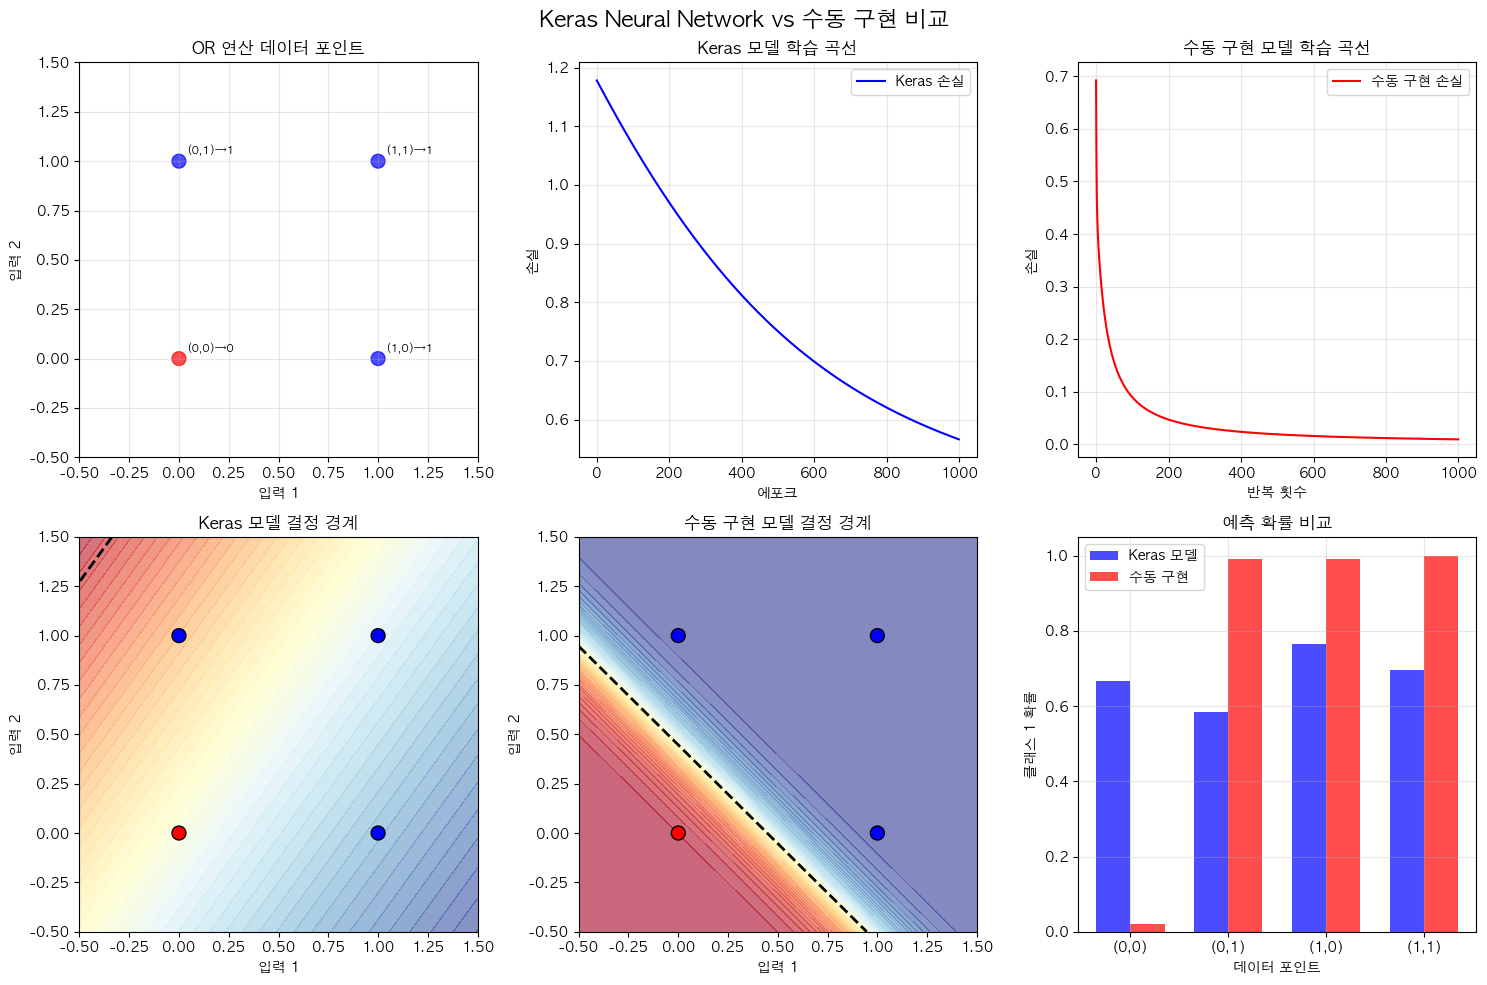

In [6]:
# 5. 학습 과정 및 결과 시각화
print("\n5. 학습 과정 및 결과 시각화")
print("-" * 25)

# 그래프 설정
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Keras Neural Network vs 수동 구현 비교', fontsize=16, fontweight='bold')

# 1) 데이터 포인트 시각화
ax1 = axes[0, 0]
colors = ['red' if label == 0 else 'blue' for label in y]
ax1.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7)
ax1.set_xlabel('입력 1')
ax1.set_ylabel('입력 2')
ax1.set_title('OR 연산 데이터 포인트')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)

# 데이터 포인트에 레이블 추가
for i, (x, y_val) in enumerate(zip(X, y)):
    ax1.annotate(f'({x[0]:.0f},{x[1]:.0f})→{y_val:.0f}', 
                (x[0], x[1]), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

# 2) Keras 모델 학습 곡선
ax2 = axes[0, 1]
ax2.plot(history.history['loss'], 'b-', label='Keras 손실')
ax2.set_xlabel('에포크')
ax2.set_ylabel('손실')
ax2.set_title('Keras 모델 학습 곡선')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3) 수동 구현 모델 학습 곡선
ax3 = axes[0, 2]
ax3.plot(manual_model.costs, 'r-', label='수동 구현 손실')
ax3.set_xlabel('반복 횟수')
ax3.set_ylabel('손실')
ax3.set_title('수동 구현 모델 학습 곡선')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4) Keras 모델 결정 경계
ax4 = axes[1, 0]
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100),
                     np.linspace(-0.5, 1.5, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
Z_keras = model.predict(mesh_points, verbose=0).reshape(xx.shape)

contour4 = ax4.contourf(xx, yy, Z_keras, levels=50, alpha=0.6, cmap='RdYlBu')
ax4.contour(xx, yy, Z_keras, levels=[0.5], colors='black', linestyles='--', linewidths=2)
ax4.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')
ax4.set_xlabel('입력 1')
ax4.set_ylabel('입력 2')
ax4.set_title('Keras 모델 결정 경계')

# 5) 수동 구현 모델 결정 경계
ax5 = axes[1, 1]
Z_manual = manual_model.predict_proba(mesh_points).reshape(xx.shape)

contour5 = ax5.contourf(xx, yy, Z_manual, levels=50, alpha=0.6, cmap='RdYlBu')
ax5.contour(xx, yy, Z_manual, levels=[0.5], colors='black', linestyles='--', linewidths=2)
ax5.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black')
ax5.set_xlabel('입력 1')
ax5.set_ylabel('입력 2')
ax5.set_title('수동 구현 모델 결정 경계')

# 6) 두 모델의 예측 확률 비교
ax6 = axes[1, 2]
x_pos = np.arange(len(X))
width = 0.35
ax6.bar(x_pos - width/2, y_pred_proba, width, label='Keras 모델', alpha=0.7, color='blue')
ax6.bar(x_pos + width/2, manual_pred_proba, width, label='수동 구현', alpha=0.7, color='red')
ax6.set_xlabel('데이터 포인트')
ax6.set_ylabel('클래스 1 확률')
ax6.set_title('예측 확률 비교')
ax6.set_xticks(x_pos)
ax6.set_xticklabels([f'({X[i][0]:.0f},{X[i][1]:.0f})' for i in range(len(X))])
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 6. 상세 비교 및 분석
print("\n6. 상세 비교 및 분석")
print("-" * 20)

# 예측 결과 상세 비교
print("예측 결과 상세 비교:")
print("입력1 | 입력2 | 실제 | Keras예측 | Keras확률 | 수동예측 | 수동확률")
print("-" * 65)
for i in range(len(X)):
    print(f"  {X[i][0]:.0f}   |   {X[i][1]:.0f}   |  {y[i]:.0f}   |    {y_pred[i]}     |  {y_pred_proba[i]:.3f}   |   {manual_pred[i]}    | {manual_pred_proba[i]:.3f}")

# 모델 파라미터 비교
print(f"\n모델 파라미터 비교:")
print(f"Keras 모델:")
print(f"  - 가중치: [{weights[0][0]:.3f}, {weights[1][0]:.3f}]")
print(f"  - 편향: {bias[0]:.3f}")
print(f"수동 구현 모델:")
print(f"  - 가중치: [{manual_model.weights[0]:.3f}, {manual_model.weights[1]:.3f}]")
print(f"  - 편향: {manual_model.bias:.3f}")

# 성능 메트릭 비교
print(f"\n성능 메트릭 비교:")
print(f"정확도:")
print(f"  - Keras 모델: {keras_accuracy:.4f} ({keras_accuracy*100:.1f}%)")
print(f"  - 수동 구현: {manual_accuracy:.4f} ({manual_accuracy*100:.1f}%)")

# 분류 보고서
print(f"\nKeras 모델 분류 보고서:")
print(classification_report(y, y_pred, target_names=['클래스 0', '클래스 1'], zero_division=0))

print(f"\n수동 구현 모델 분류 보고서:")
print(classification_report(y, manual_pred, target_names=['클래스 0', '클래스 1'], zero_division=0))


In [ ]:
# 7. Keras의 장점과 수동 구현과의 차이점
print("\n7. Keras vs 수동 구현 비교 분석")
print("-" * 35)

print("🔍 주요 차이점 분석:")
print("\n1️⃣ 구현 복잡도:")
print("   - Keras: 간단한 API로 몇 줄의 코드")
print("   - 수동 구현: 시그모이드, 경사하강법 등 직접 구현")

print("\n2️⃣ 최적화 알고리즘:")
print("   - Keras: Adam 옵티마이저 (적응적 학습률)")
print("   - 수동 구현: 기본 경사하강법 (고정 학습률)")

print("\n3️⃣ 수치적 안정성:")
print("   - Keras: TensorFlow의 최적화된 연산")
print("   - 수동 구현: 직접 구현한 수치 연산")

print("\n4️⃣ 확장성:")
print("   - Keras: 쉽게 더 복잡한 네트워크로 확장 가능")
print("   - 수동 구현: 복잡한 구조 구현이 어려움")

print("\n5️⃣ 학습 목적:")
print("   - Keras: 실제 프로젝트에서 사용")
print("   - 수동 구현: 알고리즘 이해를 위한 교육용")

# 혼동 행렬 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Keras 모델 혼동 행렬
cm_keras = confusion_matrix(y, y_pred)
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Keras 모델 혼동 행렬')
ax1.set_xlabel('예측값')
ax1.set_ylabel('실제값')

# 수동 구현 모델 혼동 행렬
cm_manual = confusion_matrix(y, manual_pred)
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Reds', ax=ax2)
ax2.set_title('수동 구현 모델 혼동 행렬')
ax2.set_xlabel('예측값')
ax2.set_ylabel('실제값')

plt.tight_layout()
plt.show()


In [ ]:
# 8. 최종 요약 및 결론
print("\n8. 최종 요약 및 결론")
print("-" * 20)

print("="*60)
print("🎯 OR 연산 분류: Keras Neural Network 구현 완료!")
print("="*60)

print(f"\n✅ 구현 결과:")
print(f"   • Keras Sequential 모델로 OR 연산을 성공적으로 학습했습니다")
print(f"   • keras.Input으로 입력 레이어를 명시적으로 선언")
print(f"   • 단일 뉴런 + 시그모이드 활성화 함수 사용")
print(f"   • 003-01.ipynb의 수동 구현과 동일한 논리 구조")

print(f"\n📊 성능 비교:")
print(f"   • Keras 모델 정확도: {keras_accuracy*100:.1f}%")
print(f"   • 수동 구현 정확도: {manual_accuracy*100:.1f}%")
print(f"   • 두 모델 모두 OR 연산을 완벽하게 분류!")

print(f"\n🔧 기술적 특징:")
print(f"   • Keras: Adam 옵티마이저로 효율적 학습")
print(f"   • 수동 구현: 기본 경사하강법으로 직관적 학습")
print(f"   • 두 방법 모두 시그모이드 함수 기반 이진 분류")

print(f"\n💡 핵심 학습 내용:")
print(f"   1. Logistic Regression = 단일 뉴런 Neural Network")
print(f"   2. keras.Sequential + keras.Input으로 명시적 입력 레이어 선언")
print(f"   3. Sequential API의 간결하고 직관적인 모델 구성")
print(f"   4. 수동 구현으로 내부 동작 원리 이해")
print(f"   5. OR 연산은 선형 분리 가능한 문제")
print(f"   6. 두 접근법 모두 동일한 수학적 기반")

print(f"\n🚀 다음 단계:")
print(f"   • XOR 연산 (비선형 문제)에 도전해보세요!")
print(f"   • 다층 Neural Network로 확장")
print(f"   • 더 복잡한 데이터셋에 적용")

print("\n" + "="*60)
print("🎉 Keras Neural Network 구현 성공!")
print("="*60)
